# Final Project - Nicholas Vaughan
## _Chaotic Motion in Double Pendulum_

## 1 Introduction

### 1.1 Chaotic Motion
#### The two main characteristics of chaotic motion is non-periodicity of longterm behavior and sensitivity to initial conditions[1]. The purpose of this pruject is to explore the chaotic nature of the double pendulum system. We will use plots demonstrate non-periodicity, and we will give a strategy for quantitatively describing the sensitivity to initial conditions using Lyapunov exponents.

### 1.2 Equations of motion
#### First, we set up our system: Our double pendulum is that of two point masses tied to the origin. m1 dangles on a massless rod of length $l_1$, while the second mass dangles from the first mass on a massless rod of length $l_2$. The Lagrangian for such a system is:

$L = T - V = (\frac{m_1}{2} + \frac{m_2}{2})l_1^2\dot{\theta_1}^2 + \frac{m_2}{2}l_2^2\dot{\theta_2}^2 + m_2l_1l_2\dot{\theta_1}\dot{\theta_2}\cos(\theta_1-\theta_2) + (m_1 + m_2)gl_1\cos{\theta_1} + m_2gl_2\cos{\theta_2}$ -> (1)

#### This Lagrangian yields the system of equations[2]:

$(m_1 + m_2)l_1\ddot{\theta_1} + m_2l_2\ddot{\theta_2}\cos(\theta_1 - \theta_2) + m_2l_2\dot{\theta_2}^2(m_1 + m_2)g\sin{\theta_1} = 0$ -> (2)

#### And

$l_2\ddot{\theta_2} + l_1\ddot{\theta_1}\cos{(\theta_1 - \theta_2)} - l_1\dot{\theta_1}^2\sin{(\theta_1 - \theta_2)} + g\sin{\theta_2} = 0$ -> (3)

#### If we define $\omega_{1,2} \equiv \dot{\theta}_{1,2}$, we can we can rearrange these equations to get[2]:

$\dot{\omega}_1 = \frac{m_2g\sin\theta_2\cos(\theta_1-\theta_2) - m_2\sin(\theta_1-\theta_2)[l_1\omega_1^2\cos(\theta_1-\theta_2) + l_2\omega_2^2] - (m_1 + m_2)g\sin{\theta_1}} {l_1[m_1 + m_2\sin^2(\theta_1-\theta_2)]}$ -> (4)

#### and

$\dot{\omega}_2 = \frac{(m_1 + m_2)[l_1\omega_1^2\sin(\theta_1-\theta_2) - g\sin{\theta_2} + g\sin{\theta_1}\cos(\theta_1-\theta_2)] + m_2l_2\omega_2^2\sin(\theta_1-\theta_2)\cos(\theta_1-\theta_2)} {l_2[m_1 + m_2\sin^2(\theta_1-\theta_2)]}$ -> (5)

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle

In [2]:
# Pendulum rod lengths (m), bob masses (kg).
l1, l2 = 1, 1
m1, m2 = 1, 1

# The gravitational acceleration (m*s-2).
g = 9.81

# The length of time scale and step size (s)
tfinal = 20
dt = .001
t = np.arange(0, tfinal+dt, dt) #Resulting time-frame array

EDRIFT = 1.01 # Numerical drift tolerance as a percentage of initial Hamiltonian

In [3]:
def getDot(var, t, l1, l2, m1, m2):
    
    """
    Returns: First derivatives of omega_1,2 and theta_1,2
    -----------------------------------------------------
    Inputs:
    var - array like object conataining theta1, theta2, omega1, and omega2.
    t - time array
    l1,l2 - respective lengths of the pendulums to the masses
    m1,m2 - masses of each pendulum
    
    """
    
    #Pull in values from var
    th1 = var[0]
    th2 = var[2]
    om1 = var[1]
    om2 = var[3]
    
    #First derivatives of thetas are just the omegas
    thdot1 = om1
    thdot2 = om2
    
    #Since these terms show up a lot, it's cleaner to assign them to shorter variables
    A = np.cos(th1-th2)
    B = np.sin(th1-th2)
    
    #Calculate first derivative of omegas
    omdot1 = ((m2*g*np.sin(th2)*A - m2*B*(l1*om1**2*A + l2*om2**2) - (m1+m2)*g*np.sin(th1))/
              (l1*(m1+m2*B**2)))
    omdot2 = (((m1+m2)*(l1*om1**2*B - g*np.sin(th2) + g*np.sin(th1)*A) + m2*l2*A*B*om2**2)/
              (l2*(m1+m2*B**2)))
    
    return thdot1, omdot1, thdot2, omdot2
    

In [4]:
def getEnergy(var):
    """
    Returns: 
    The total amount of energy of the system. This is to help keep numerical drift 
    within a given tolerence.
    ------------------------------------------------------------------------------
    Inputs:
    var - array like object conataining theta1, theta2, omega1, and omega2.   
    """
    th1, th1d, th2, th2d = var.T
    V = -(m1+m2)*l1*g*np.cos(th1) - m2*l2*g*np.cos(th2)
    
    T = 0.5*m1*(l1*th1d)**2 + 0.5*m2*((l1*th1d)**2 + (l2*th2d)**2 +
            2*l1*l2*th1d*th2d*np.cos(th1-th2))
    return T + V

In [5]:
def makePlots(th1,th2,om1,om2,t):
    """
    Inputs: 
    th1,2 - Angle trajectory arrays
    om1,2 - Frequency trajectory arrays
    t - time array
    -----------------------------------------------------------------------
    This function makes plots of relative angle and frequency trajectories as
    well as 2-d projections of the phase space diagram
    """

    # Thetas plot
    plt.plot(t,th1,label = "theta_1")
    plt.plot(t,th2,label = "theta_2")
    plt.xlabel('Time(s)')
    plt.ylabel('Theta(rad)')
    plt.legend()
    plt.show()
    plt.clf()

    # Omegas plot
    plt.plot(t,om1,label = "omega_1")
    plt.plot(t,om2,label = "omega_2")
    plt.xlabel('Time(s)')
    plt.ylabel('Omega(rad/s)')
    plt.legend()
    plt.show()
    plt.clf()

    #Phase-space diagram
    plt.plot(th1,om1,label='Mass_1')
    plt.plot(th2,om2,label='Mass_2')
    plt.title('Phase space projection into 2-d')
    plt.xlabel('Theta(rad)')
    plt.ylabel('Omega(rad/s)')
    plt.legend()
    plt.show()
    plt.clf()

In [6]:
th1_0 = 3*np.pi/7
th2_0 = np.pi/2
om1_0 = .2
om2_0 = 0

initial = np.array([th1_0,om1_0,th2_0,om2_0])

ret = odeint(getDot, initial, t, args=(l1,l2,m1,m2))


# Total energy from the initial conditions
E = getEnergy(initial)

# Check that the calculation conserves total energy to within given tolerance.
if np.max(np.abs(getEnergy(ret)/E)) > EDRIFT:
    sys.exit('Maximum energy drift of {} % exceeded.'.format((EDRIFT-1)*100))

th1 = ret[:,0]
th2 = ret[:,2]
om1 = ret[:,1]
om2 = ret[:,3]


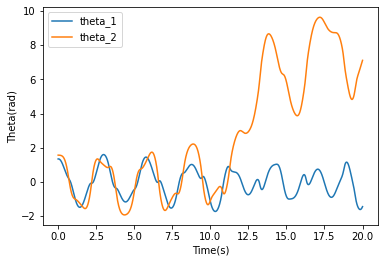

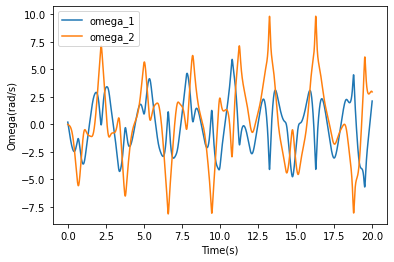

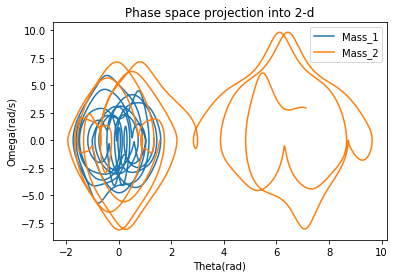

<Figure size 432x288 with 0 Axes>

In [7]:
makePlots(th1,th2,om1,om2,t)

## ------------------------------------------------------------------------------------------
#### As can be seen with these plots, the system maintains a semblance of periodicity, but begins to behave erratically in the long term. While this is one example, Section 2 shows how a slight change in initial angle can cause the longterm behavior to diverge in different ways.
# -------------------------------------------------------------------------------------

## 2 Quantifying the Chaos - Lyapunov Exponents
### 2.1 Finding $\lambda$

  #### One way of measuring chaos is determining how quickly the system with two near identical initial conditions diverges. If the system is chaotic, the divergence should be initially exponential, i.e., $e^{\lambda\theta}$ where $\lambda$ is the Lyapunov exponent. The larger the Lyapunov exponent, the more chaotic the system. If the long term motion of the system is nonchaotic, the Lyapunov exponent is negative. If the exponent is positive, the long term motion is chaotic.[1]
   #### To approximate the exponent for this system, we will define a "distance", $d_{\theta}(k) \equiv |\theta_{i+k} - \theta_{j+k}|$, where i and j indicate $\theta$'s with two different, but similar, initial states. Since $\lambda$ is defined via the magnitude of a difference vector in phase space, we need to include the divergence of both generalized coordinates and momenta: We will have a euclidean "distance" $d(k) = \sqrt{(d_{\theta_1}(k))^2 + (d_{\theta_2}(k))^2) + (d_{\omega_1}(k))^2 + (d_{\omega_2}(k))^2}$. By plotting the $ln(d(k))$ vs. $k$ ($k$ being our index of time-step) and getting a linear fit, the Lyapunov exponent is approximately the slope of that linear fit, as $ln(e^{\lambda t}) = \lambda t$. 

In [8]:
def L_exp(th1i,th1j,th2i,th2j,om1i,om1j,om2i,om2j):
    """
    This function calcualates the Lyapunov Exponent of the system
    
    Inputs:
    Theta_1 and Theta_2 trajectories for i initial state, and j initial state
    ---------------------------------------------------------------------------
    Returns: 
    le: Lyapunov exponent based on euclidean distance in units of s^-1
    """
    
    #Make sure that arrays are all the right length
    assert(len(th1i) == len(th1j) and len(th1j) == len(th2i) and len(th2i) == len(th2j) 
          and len(th1i) == len(om1i) and len(th1i) == len(om1j) and len(th1i) == len(om2i)
          and len(th1i) == len(om2j))
    
    #Number of time-steps in ms
    k = np.arange(0,len(th1i))
    
    #Calculate the differences for each index and magnitude of distance vector d(k)
    dth1 = th1i - th1j
    dth2 = th2i - th2j
    dom1 = om1i - om1j
    dom2 = om2i - om2j
    
    dk = np.sqrt(dth1**2 + dth2**2 + dom1**2 + dom2**2)
    
    #Apply a linear fit to ln(d(k)). Parameters stored in linfit, slope stored
    #in units of ms^-1
    linfit = np.polyfit(k,np.log(dk),1)
    

    #Plot and show linfit, then return slope value in correct units
    plt.plot(k, np.log(dk), color= 'Red', label= 'Actual')
    plt.title('Ln of Generalized Distance Vs, Time Step')
    plt.xlabel('k (ms)')
    plt.ylabel('ln(dk)')
    
    lin_fn = np.poly1d(linfit)
    x_s = np.arange(0,len(dk))
    plt.plot(x_s,lin_fn(x_s), color= 'Green', label= 'Linear Fit')
    plt.legend()
    
    return linfit[0]*1000 # To get lambda in units of s^-1

#### For our first initial state we will use the trajectories already calculated:

In [9]:
th1i = th1
th2i = th2
om1i = om1
om2i = om2

#### For our second initial state, we will tweak the initial angles and see what happens

In [80]:
#Initial conditions for second trajectory
th1_0 = 3*np.pi/7
th2_0 = np.pi/2 + .01 #slight difference of .01 rad. - ONLY change
om1_0 = 0.2
om2_0 = 0 

In [81]:
initial = np.array([th1_0,om1_0,th2_0,om2_0])
ret = odeint(getDot, initial, t, args=(l1,l2,m1,m2))


# Total energy from the initial conditions
E = getEnergy(initial)

# Check that the calculation conserves total energy to within some tolerance.
if np.max(np.sum(np.abs(getEnergy(ret) - E))) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

th1j = ret[:,0]
th2j = ret[:,2]
om1j = ret[:,1]
om2j = ret[:,3]


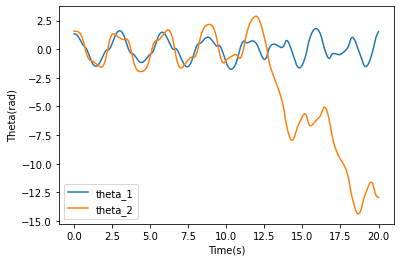

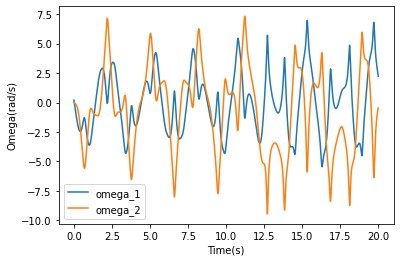

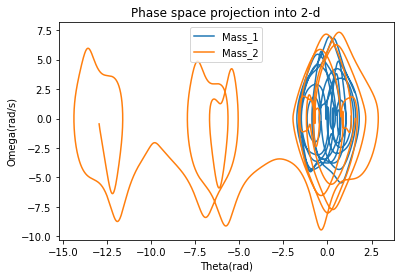

<Figure size 432x288 with 0 Axes>

In [82]:
makePlots(th1j,th2j,om1j,om2j,t)

#### Putting in these two states into our L_exp function:

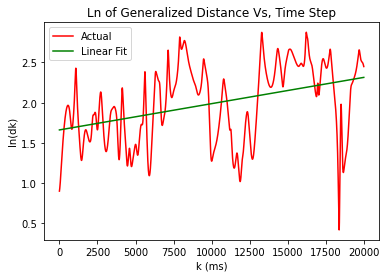

In [78]:
L_e = L_exp(th1i,th1j,th2i,th2j,om1i,om1j,om2i,om2j)


In [79]:
print('Lambda ~ %g/s' % (L_e))

Lambda ~ 0.0326319/s


## ------------------------------------------------------------------------------------------
#### We get a positive $\lambda$ value here, meaning that we have chaotic behavior. But to get a sense of how chaotic, we need to know how to compare this value to systems that we would predict to be more or less chaotic.

#### One could imagine that if m_2 >> m_1, and l_2 >> l_1 then the system would look a lot more like Simple harmonic motion in large time-scales than the current set up of equal lengths and masses. We can see in equations 1-5, terms not containing l2 or m2 will become negligible. But we can test this hypothesis by finding $\lambda$ for this system with the same 2 trajectories as our initial $\lambda$ calculation, then comparing our results:

In [15]:
m2,l2 = 100,100

In [16]:
#Set up 1st trajectory
th1_0 = 3*np.pi/7
th2_0 = np.pi/2
om1_0 = .2
om2_0 = 0

In [17]:
initial = np.array([th1_0,om1_0,th2_0,om2_0])

ret = odeint(getDot, initial, t, args=(l1,l2,m1,m2))

# Check that the calculation conserves total energy to within some tolerance.

# Total energy from the initial conditions
E = getEnergy(initial)

# Check that the calculation conserves total energy to within some tolerance.
if np.max(np.abs(getEnergy(ret)/E)) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

In [18]:
th1i = ret[:,0]
th2i = ret[:,1]
om1i = ret[:,2]
om2i = ret[:,3]

In [19]:
# Set up Second trajectory
th1_0 = 3*np.pi/7
th2_0 = np.pi/2 + .01 #slight difference of .01 rad -  ONLY change
om1_0 = 0.2
om2_0 = 0

In [20]:
initial = np.array([th1_0,om1_0,th2_0,om2_0])

ret = odeint(getDot, initial, t, args=(l1,l2,m1,m2))


# Total energy from the initial conditions
E = getEnergy(initial)

# Check that the calculation conserves total energy to within some tolerance.
if np.max(np.abs(getEnergy(ret)/E)) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

In [21]:
th1j = ret[:,0]
th2j = ret[:,1]
om1j = ret[:,2]
om2j = ret[:,3]

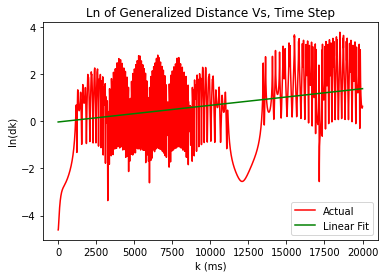

In [22]:
L_e = L_exp(th1i,th1j,th2i,th2j,om1i,om1j,om2i,om2j)

In [23]:
print('Lambda ~ %g/s' % (L_e))

Lambda ~ 0.070563/s


## ------------------------------------------------------------------------------------------
#### It is indeed a lower $\lambda$! We can perhaps make it even more stable by reducing the total energy of the system with a small angle approximation.

In [24]:
#Set up 1st trajectory with small angles
th1_0 = .05
th2_0 = .05
om1_0 = 0
om2_0 = 0

In [25]:
initial = np.array([th1_0,om1_0,th2_0,om2_0])

ret = odeint(getDot, initial, t, args=(l1,l2,m1,m2))

# Check that the calculation conserves total energy to within some tolerance.

# Total energy from the initial conditions
E = getEnergy(initial)

# Check that the calculation conserves total energy to within some tolerance.
if np.max(np.abs(getEnergy(ret)/E)) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

In [26]:
th1i = ret[:,0]
th2i = ret[:,1]
om1i = ret[:,2]
om2i = ret[:,3]

In [27]:
# Set up Second trajectory
th1_0 = 0.05
th2_0 = 0.05 + .01 #slight difference of .01 rad -  ONLY change
om1_0 = 0
om2_0 = 0

In [28]:
initial = np.array([th1_0,om1_0,th2_0,om2_0])

ret = odeint(getDot, initial, t, args=(l1,l2,m1,m2))

# Check that the calculation conserves total energy to within some tolerance.

# Total energy from the initial conditions
E = getEnergy(initial)

# Check that the calculation conserves total energy to within some tolerance.
if np.max(np.abs(getEnergy(ret)/E)) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

In [29]:
th1j = ret[:,0]
th2j = ret[:,1]
om1j = ret[:,2]
om2j = ret[:,3]

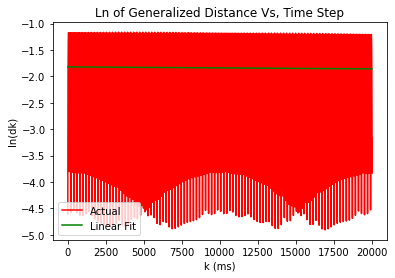

In [30]:
L_e = L_exp(th1i,th1j,th2i,th2j,om1i,om1j,om2i,om2j)

In [31]:
print('Lambda ~ %g/s' % (L_e))

Lambda ~ -0.00192088/s


## ------------------------------------------------------------------------------------------

#### Even Lower, and in this case negative, meaning that it toward SHO. Note that the range of oscillation in ln(d(k)) is negative, meaning that the difference in trajectories is never greater than 1. Now we can go the other direction, giving enough initial energy to flip the pendulum around. Perhaps this will give a larger $\lambda$.

In [46]:
#We'll go back to ratios of masses and lengths being the same.
m2,l2 = 1, 1

In [67]:
#Set up 1st trajectory
th1_0 = 3*np.pi/7
th2_0 = np.pi/2
om1_0 = 2
om2_0 = 2

In [68]:
initial = np.array([th1_0,om1_0,th2_0,om2_0])

ret = odeint(getDot, initial, t, args=(l1,l2,m1,m2))

# Check that the calculation conserves total energy to within some tolerance.

# Total energy from the initial conditions
E = getEnergy(initial)

# Check that the calculation conserves total energy to within some tolerance.
if np.max(np.abs(getEnergy(ret)/E)) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

In [69]:
th1i = ret[:,0]
th2i = ret[:,1]
om1i = ret[:,2]
om2i = ret[:,3]

In [70]:
# Set up Second trajectory
th1_0 = 3*np.pi/7
th2_0 = np.pi/2 +.01
om1_0 = 2
om2_0 = 2

In [71]:
initial = np.array([th1_0,om1_0,th2_0,om2_0])

ret = odeint(getDot, initial, t, args=(l1,l2,m1,m2))

# Check that the calculation conserves total energy to within some tolerance.

# Total energy from the initial conditions
E = getEnergy(initial)

# Check that the calculation conserves total energy to within some tolerance.
if np.max(np.abs(getEnergy(ret)/E)) > EDRIFT:
    sys.exit('Maximum energy drift of {} exceeded.'.format(EDRIFT))

In [72]:
th1j = ret[:,0]
th2j = ret[:,1]
om1j = ret[:,2]
om2j = ret[:,3]

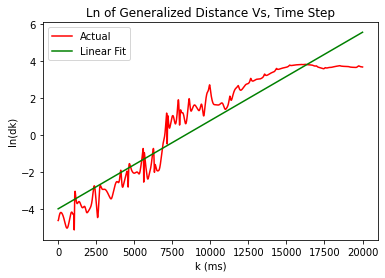

In [73]:
L_e = L_exp(th1i,th1j,th2i,th2j,om1i,om1j,om2i,om2j)

In [74]:
print('Lambda ~ %g/s' % (L_e))

Lambda ~ 0.475966/s


## ------------------------------------------------------------------------------------------
#### We see an increase in divergence, which makes sense given that there is sufficient energy in the system to lessen the bound on the angle. Now that we can put a number to chaotic behavior, we should test to see if our $\lambda$ gives us the right number for a known system.

## ------------------------------------------------------------------------------------------
### 2.2 Testing algorithm with symplectic SHO

#### A system in Simple Harmonic Oscillation is the opposite of chaotic. If we run such a system through our algorithm, we should theoretically get a $\lambda$ of $0$. Numerically, since we will be using Euler's method, we would be good to get a tolerance within $dt^2$. To help get rid of numerical drift as a consideration, we will use the symplectic shadow Hamiltonian for SHO derived in class[2] and Eulers method for the trajectory:

$H(p,q) = \frac{1}{2}(p^2 + q^2)$

$\bar{H}(p,q) = H(p,q) + \frac{dt}{2}qp$

$\dot{q} = \frac{\partial{\bar{H}}}{\partial{p}} = (1+\frac{dt}{2})p$

$\dot{p} = -\frac{\partial{\bar{H}}}{\partial{q}} = - (1+\frac{dt}{2})q$

$q_{i+1} = q_i + p_{i}dt$

$p_{i+1} = p_{i} - q_{i+1}dt $



In [41]:
def Euler_SHO(t, q0, p0):
    
    q = np.zeros_like(t)
    p = np.zeros_like(t)
    dt = t[1]-t[0]
    print(dt)
    
    p[0], q[0] = p0, q0
    
    #symplectic Euler stepping
    for i in range(0, len(p)-1):
        q[i+1] = q[i] + dt*p[i]
        p[i+1] = p[i] - dt*q[i+1]
    
    return q, p

In [42]:
def L_e_SHO(qi,qj,pi,pj):
    """
    Calculates Lyapunov exponent for SHO.
    
    Inputs: 
    pi,qi - First coordinate and momentum trajectory - Array
    pj,qj - Second coordinate and momentum trajectory - Array
    
    Returns:
    L_e - Lyapunov exponent
    """
    assert(len(qi) == len(qj) and len(qi) == len(pi) and len(qi) == len(pj))
    
    k = np.arange(0,len(qi))
    dq = np.abs(qi-qj)
    dp = np.abs(pi-pj)
    dk = np.sqrt(dp**2 + dq**2)
    
    #Apply a linear fit to ln(d(k)). Parameters stored in linfit, slope stored
    #in units of ms^-1
    linfit = np.polyfit(k,np.log(dk),1)
    

    #Plot and show linfit, then return slope value in correct units
    plt.plot(k, np.log(dk), color= 'Red', label= 'Actual')
    plt.title('Ln of Generalized Distance Vs, Time Step')
    plt.xlabel('k (ms)')
    plt.ylabel('ln(dk)')
    
    lin_fn = np.poly1d(linfit)
    x_s = np.arange(0,len(dk))
    plt.plot(x_s,lin_fn(x_s), color= 'Green', label= 'Linear Fit')
    plt.legend()
    
    return linfit[0]*1000 # To get lambda in units of s^-1

In [43]:

#Initial conditions
#First trajectory
q0i = 1
p0i = 0

#Second trajectory
q0j = .99
p0j = 0

qi,pi = Euler_SHO(t, q0i, p0i)
qj,pj = Euler_SHO(t, q0j, p0j)

0.001
0.001


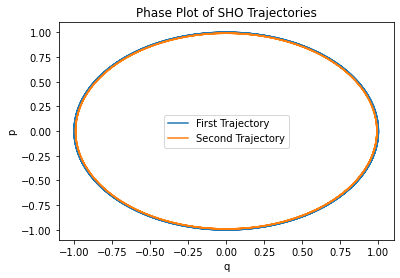

In [44]:
plt.plot(qi,pi,label='First Trajectory')
plt.plot(qj,pj,label='Second Trajectory')
plt.title('Phase Plot of SHO Trajectories')
plt.xlabel('q')
plt.ylabel('p')
plt.legend()

Approximated lambda =  -5.538930310272662e-07


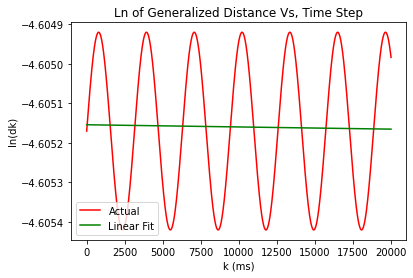

In [45]:
L_e = L_e_SHO(qi,qj,pi,pj)
assert(np.abs(L_e) < dt**2)
print("Approximated lambda = ", L_e)

## ------------------------------------------------------------------------------------------
#### Thus we see that the $\lambda$ for the simple oscillator falls within our tolerence and is negative as well, implying that the system converges even more to periodicity.
## ------------------------------------------------------------------------------------------


## 3 Conclusion

#### Here we have demonstrated the non-periodicity of the double pendulum system as well as demonstrated that we can apply a numerical value to chaotic behavior via Lyapunov exponents. The algorithm used passed intuitive qualitative tests as well as known value tests such as with the SHO. There is still much more that can be explored in this realm, such as with augmenting the system with driving forces or dampening, to which I will be returning in the future as a fun exercise. It is also worth noting that this project limited its scope to analyzing sensitivity to initial conditions along only 1-dimension (the second angle). 

## References

1. Taylor, John R. *Classical Mechanics*. University Science Books. 2005
2. Equations calculated independently, but followed the process from https://scipython.com/blog/the-double-pendulum/
3. Neil, Ethan. *https://physicscourses.colorado.edu/phys5070/phys5070_sp21/lecture/lec20-symplectic-integrators/*